In [ ]:
!pip install mlpack
!pip install conda
!conda install -c mlpack mlpack

     |████████████████████████████████| 93.0 MB 48 kB/s 
     |████████████████████████████████| 299 kB 7.6 MB/s 
     |████████████████████████████████| 66 kB 4.6 MB/s 
     |████████████████████████████████| 109 kB 54.1 MB/s 
     |████████████████████████████████| 546 kB 38.3 MB/s 
  Created wheel for conda: filename=conda-4.3.16-py3-none-any.whl size=336960 sha256=a6168d33284917ad971338f92e5329c0e02638519fdee60f7c6169574f2f6017
  Stored in directory: /root/.cache/pip/wheels/66/ec/2c/cce33d7a071720882d948fd3364d3ff5562bac9e5638768d41
  Created wheel for pycosat: filename=pycosat-0.6.3-cp37-cp37m-linux_x86_64.whl size=143838 sha256=a9bf91301708e77b37daa66feacba5d76d79d15ef655d9dd6796358593796e3c
  Stored in directory: /root/.cache/pip/wheels/c8/29/0e/a226b7c5a4f24e246f25201c0b1fbf6fb8f19f9cce89b02c36
Successfully built conda pycosat
ERROR: The install method you used for conda--probably either `pip install conda`
or `easy_install conda`--is not compatible with using conda as an appli

In [ ]:
from sklearn import datasets
from mlpack import emst
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import timeit

# ***Start of TopoPy***

*Finding the rigid motion (rotation plus translation) that minimizes the sum of squared distances to the expanded convex hull without penetrating it.*

In [ ]:
def calculate_angle(point1, point2):
  x = point2[0] - point1[0]
  y = point2[1] - point1[1]
  angle = -np.arctan2(y, x)
  return angle

*Convex hull is used to perform the alignment by appropriately transforming both components.*

In [ ]:
def align_hull(points, vertices, top):
  center = points[vertices[0]]
  rotated_points = np.zeros((0, 2))

  if top == True: # bottom edge of convex hull parallel to x-axis
    angle = calculate_angle(points[vertices[0]], points[vertices[1]])
  else: # top edge of convex hull parallel to x-axis
    angle = calculate_angle(points[vertices[0]], points[vertices[1]]) + np.pi

  for i in range(points.shape[0]):
    if i == vertices[0]: 
      rotated_points = np.vstack((rotated_points, center))
    else:
      x = points[i][0] - center[0]
      y = points[i][1] - center[1]

      x_prime = (x*np.cos(angle)) - (y*np.sin(angle)) + center[0]
      y_prime = (x*np.sin(angle)) + (y*np.cos(angle)) + center[1]

      xy_prime = np.array([x_prime, y_prime])
      rotated_points = np.vstack((rotated_points, xy_prime))

  rotated_points = rotated_points - center
  return rotated_points 

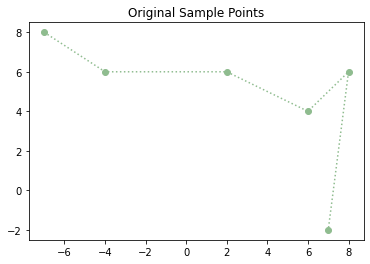

In [ ]:
pts = np.array([(-7,8),(-4,6), (2,6), (6,4), (8,6), (7,-2)])
hull = ConvexHull(pts)
hull_pts = align_hull(pts, hull.vertices, True)
x = pts[:,0]
y = pts[:,1]
plt.title("Original Sample Points")
plt.plot(x, y, color = "darkseagreen", marker = "o", linestyle=':')


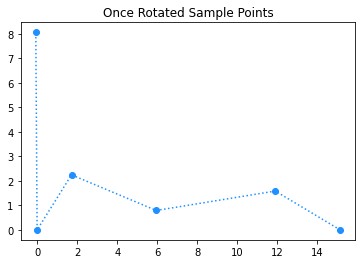

In [ ]:
x = hull_pts[:,0]
y = hull_pts[:,1]
plt.title("Once Rotated Sample Points")
plt.plot(x, y, color='dodgerblue', marker = "o", linestyle=':')


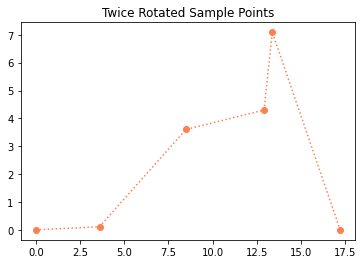

In [ ]:
hull2 = ConvexHull(hull_pts)
hull_pts2 = align_hull(hull_pts, hull2.vertices, True)
x = hull_pts2[:,0]
y = hull_pts2[:,1]
plt.title("Twice Rotated Sample Points")
plt.plot(x, y, color='coral', marker = "o", linestyle=':')


# ***Loading Iris Dataset***

In [ ]:
#Iris Dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target
iris_df.drop_duplicates(inplace = True)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


*   *The ordered set of topology changing edges is equivalent to the set of edges of the minimum spanning tree, in increasing order of weight.*
*   *The algorithm places the points onto a plane such that the MST edges are preserved.* 



#***Loading Breast Cancer Dataset***

In [ ]:
bc = datasets.load_breast_cancer()
bc_df = pd.DataFrame(bc.data, columns=[bc.feature_names])
bc_df['target'] = pd.Series(data=bc.target, index=bc_df.index)
bc_df.drop_duplicates(inplace = True)
bc_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# ***EMST***

In [ ]:
# each row represents an edge in Iris dataset
# column 0 --> lesser index of the edge
# column 1 --> greater index of the edge
# column 2 --> distance between two points

def compute_EMST(): 
    Emst = emst(input = points, naive=False)
    out = Emst['output']
    vertices = out[:,0:2]
    edges = out[:,2]
    return vertices, edges 

In [ ]:
#Euclidean Minimum Spanning Tree 
#IRIS
# points = iris_df.drop('target', axis = 1).to_numpy()
# target = iris_df['target'].to_numpy()

#BREAST CANCER
points = bc_df.drop('target', axis = 1).to_numpy()
target = bc_df['target'].to_numpy()
r2_points = None 
v, e = compute_EMST()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


# ***Generalized MST Implementation***
##### Allows for various distance metric inputs

In [ ]:
#referenced from https://peekaboo-vision.blogspot.com/2012/02/simplistic-minimum-spanning-tree-in.html
#Minimum Spanning Tree that allows for additional distance metrics
from scipy.spatial.distance import pdist, squareform, cityblock, euclidean

def minimum_spanning_tree(X, copy_X = True):
    #X --> edge weights of fully connected graph
    if copy_X:
        X = X.copy()

    if X.shape[0] != X.shape[1]:
        raise ValueError("X needs to be square matrix of edge weights")
    
    vertices = X.shape[0]
    spanning_edges = []
    
    #initialize with node 0                                                                                         
    visited_vertices = [0]                                                                                            
    num_visited = 1

    #excludes self connections
    diag_indices = np.arange(vertices)
    X[diag_indices, diag_indices] = np.inf
    
    while num_visited != vertices:

        new_edge = np.argmin(X[visited_vertices], axis=None)
        # print(X[visited_vertices])
        
        #new_edge, get correct indices                                                      
        new_edge = divmod(new_edge, vertices) #(quotient, remainder)
        
        new_edge = [visited_vertices[new_edge[0]], new_edge[1]]     
        # print(new_edge)                                                 
        
        #adds edge to tree
        spanning_edges.append(new_edge)
        visited_vertices.append(new_edge[1])
       
        #remove all edges inside current tree
        X[visited_vertices, new_edge[1]] = np.inf
        X[new_edge[1], visited_vertices] = np.inf                                                                     
        num_visited += 1
    # print(spanning_edges)
    
    return vertices, visited_vertices, np.vstack(spanning_edges)

In [ ]:
def test_mst(data, distance_metric):
    # data = iris_df.drop('target', axis = 1).to_numpy()

    d = [] 
    for i in range(data.shape[0]):  
      d.append(cityblock(data[i][0], data[i][1]))
    # print(d)

    cityblockDF = pd.DataFrame(data) 
    cityblockDF['dist'] = d 
    # print(cityblockDF)
    


    start = timeit.default_timer()
    X = squareform(pdist(data, distance_metric))

    # print(len(pdist(data, distance_metric)))
    # print(X.shape)

    # print(X)
    v, visited, edge_list = minimum_spanning_tree(X)
    # print(v)
    # print(visited)
    # print(edge_list)

    stop = timeit.default_timer()
    
    plt.title(distance_metric)
    plt.scatter(data[:, 0], data[:, 1], color = "darkseagreen")
    
    for edge in edge_list:
        i, j = edge
        plt.plot([data[i, 0], data[j, 0]], [data[i, 1], data[j, 1]], c='forestgreen', linestyle =":")
    plt.show()
    print("(" + distance_metric + ") "+ 'Execution Time: ', stop - start)  

###MST using the Breast Cancer Dataset 



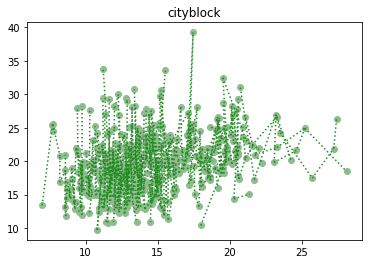

(cityblock) Execution Time:  0.2593178260012792


In [ ]:
#Manhattan/City Block
data = points
test_mst(data, "cityblock")

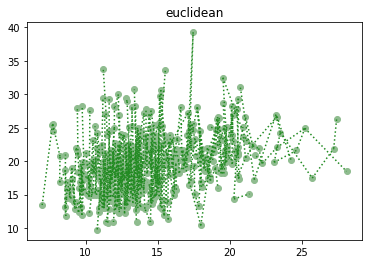

(euclidean) Execution Time:  0.26407850199939276


In [ ]:
test_mst(data,'euclidean')

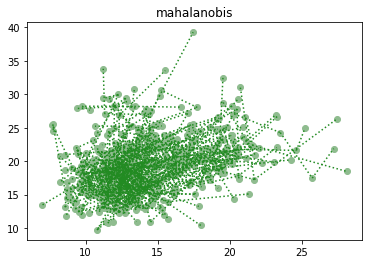

(mahalanobis) Execution Time:  0.3962609039990639


In [ ]:
test_mst(data,'mahalanobis')